In [1]:
x_1=0.3
x_2=3
z=1+5*x_1-0.3*x_2
print('z=',z)
p=(round(1/(1+2.718**(-z)),2))
print('p=',p)

z= 1.6
p= 0.83


Задание 2.9
1 point possible (graded)
Для выполнения задания скачайте набор данных.

Таблица состоит из четырёх столбцов:

SNo — номер строки (данный столбец вам не понадобится, вы можете сразу его удалить);
X_1 и X_2 — факторы;
y — целевой признак.
Обучите модель логистической регрессии для предсказания целевого признака y. В качестве алгоритма оптимизации используйте стохастический градиентный спуск (масштабировать данные не нужно). В качестве значения параметра random_state возьмите число 42, остальные параметры оставьте по умолчанию.

Воспользуйтесь функцией plot_probabilities_2d(), которую мы объявили ранее. Постройте визуализацию разделяющей поверхности.

Сколько объектов класса 0 будут неверно отнесены моделью к классу 1?

In [2]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации


import warnings # для игнорирования предупреждений
#Игнорируем варнинги
warnings.filterwarnings('ignore')


# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('../../data/task_data.csv')
data.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [4]:
data.info()
print(data.shape)
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SNo     100 non-null    int64  
 1   X_1     100 non-null    float64
 2   X_2     100 non-null    float64
 3   y       100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.2 KB
(100, 4)


,SNo,X_1,X_2,y
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.020093,0.043525,0.600000
std,29.011492,0.557790,0.544421,0.492366
min,0.000000,-1.000000,-1.000000,0.000000
25%,24.750000,-0.402007,-0.485076,0.000000
50%,49.500000,0.059902,0.086310,1.000000
75%,74.250000,0.437707,0.428448,1.000000
max,99.000000,1.000000,1.000000,1.000000


In [5]:
temp_data=data.copy()
temp_data=temp_data.drop('SNo',axis=1)
temp_data

,X_1,X_2,y
0,-0.869144,0.389310,0.0
1,-0.993467,-0.610591,0.0
2,-0.834064,0.239236,0.0
3,-0.136471,0.632003,1.0
4,0.403887,0.310784,1.0
...,...,...,...
95,0.531635,-0.479185,1.0
96,-0.650192,0.655303,1.0
97,0.985299,0.118333,1.0
98,-0.275289,0.005730,1.0


In [6]:
X=temp_data.drop('y',axis=1)
y=temp_data['y']

In [7]:
from sklearn import linear_model #линейные модели

In [8]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минизируя logloss
log_reg_2d.fit(X, y)

LogisticRegression(random_state=42)

In [9]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-0.5, X.iloc[:, 0].max()+0.5, 0.1),
        np.arange(X.iloc[:, 1].min()-0.5, X.iloc[:, 1].max()+0.5, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линия, где вероятность равна 0.5.
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

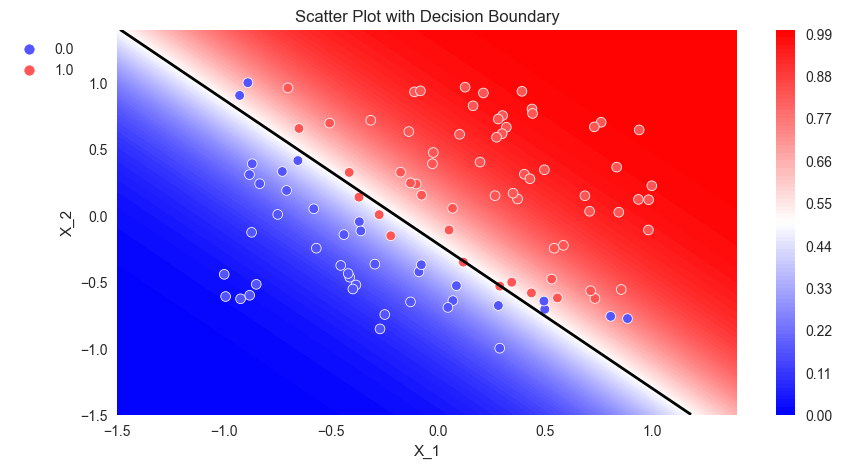

In [10]:
plot_probabilities_2d(X, y, log_reg_2d)

In [16]:
y_predict = log_reg_2d.predict(X)

n=0
for i in range(len(y_predict)):
    if (y.iloc[i] == 0) and (y.iloc[i] != y_predict[i]):
        n+=1

print('У нас {} объектов класса 0 будут неверно отнесены моделью к классу 1'.format(n))

У нас 6 объектов класса 0 будут неверно отнесены моделью к классу 1
